In [1]:
import os
from shutil import rmtree

import xarray as xr

from src.test_problem import setup_solver
from src import nk_driver

from utils import plot_all_vars

%matplotlib inline

In [2]:
wdir = os.path.join(os.getenv("HOME"), "test_run_dye_decay_wdir")
if os.path.exists(wdir):
    if os.path.isfile(wdir):
        os.remove(wdir)
    else:
        rmtree(wdir)

In [3]:
common_args = ["--workdir", wdir, "--tracer_module_names", "dye_decay_{suff}:001:010:100"]

In [4]:
setup_solver.main(setup_solver.parse_args(common_args + ["--fp_cnt", "1"]))

2020-06-05 08:36:02,956:79844:setup_solver.py:main:args.cfg_fname="/Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/newton_krylov.cfg"
2020-06-05 08:36:02,966:79844:gen_invoker_script.py:gen_invoker_script:generating /Users/klindsay/test_run_dye_decay_wdir/nk_driver.sh
2020-06-05 08:36:02,967:79844:setup_solver.py:main:grid_weight_fname="/Users/klindsay/test_run_dye_decay_wdir/depth_axis_test.nc"
2020-06-05 08:36:02,999:79844:setup_solver.py:main:fp_iter=0
2020-06-05 08:36:13,256:79844:setup_solver.py:main:init_iterate_fname="/Users/klindsay/test_run_dye_decay_wdir/gen_init_iterate/init_iterate.nc"


<xarray.Dataset>
Dimensions:        (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth          (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges    (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds   (depth, nbnds) float64 ...
    depth_delta    (depth) float64 ...
    dye_decay_001  (depth) float64 ...
    dye_decay_010  (depth) float64 ...
    dye_decay_100  (depth) float64 ...
Attributes:
    history:  2020-06-05 08:36:03: created by src.test_problem.model_state.Mo...


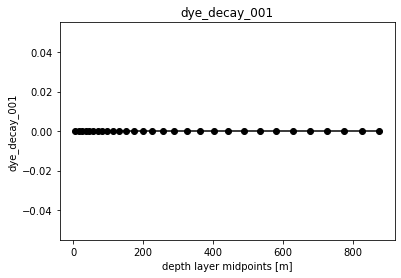

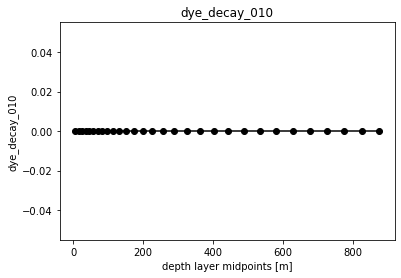

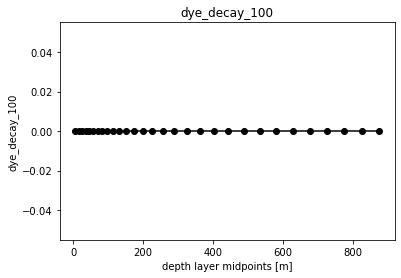

In [5]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:                   (depth: 30, depth_edges: 31, nbnds: 2, time: 101)
Coordinates:
  * time                      (time) object 0001-01-01 00:00:00 ... 0002-01-01 00:00:00
  * depth                     (depth) float64 5.0 15.01 25.07 ... 825.0 875.0
  * depth_edges               (depth_edges) float64 0.0 10.0 ... 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds              (depth, nbnds) float64 ...
    depth_delta               (depth) float64 ...
    bldepth                   (time) float64 ...
    mixing_coeff              (time, depth_edges) float64 ...
    dye_decay_001             (time, depth) float64 ...
    dye_decay_001_time_mean   (depth) float64 ...
    dye_decay_001_time_anom   (time, depth) float64 ...
    dye_decay_001_time_delta  (depth) float64 ...
    dye_decay_001_depth_int   (time) float64 ...
    dye_decay_010             (time, depth) float64 ...
    dye_decay_010_time_mean   (depth) float64 ...
    dye_

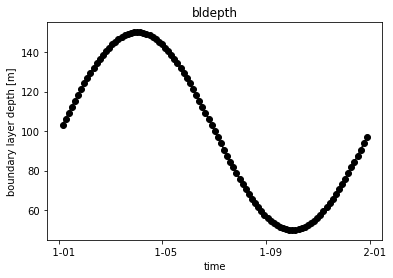

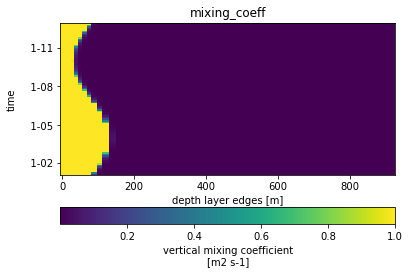

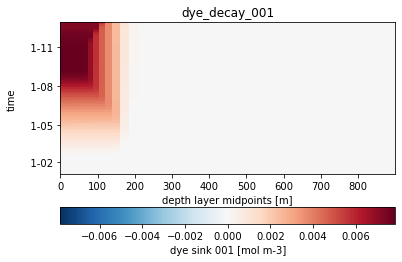

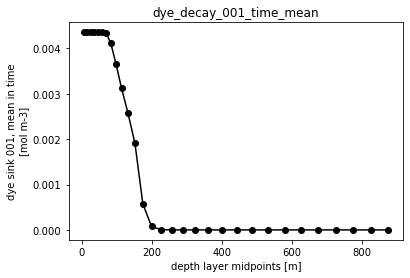

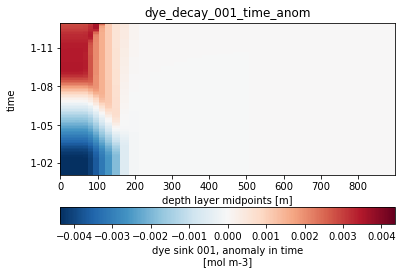

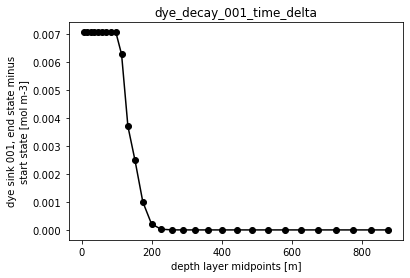

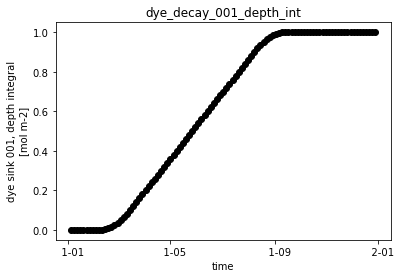

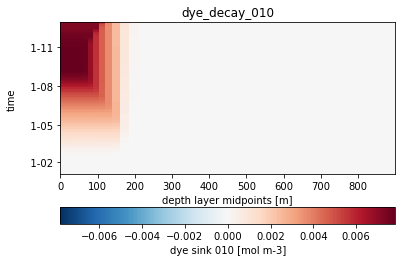

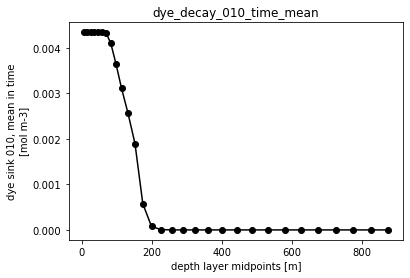

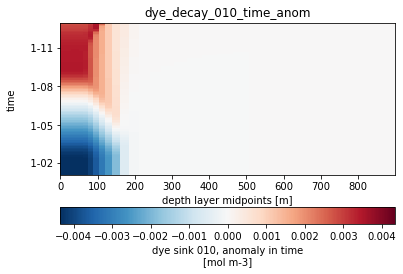

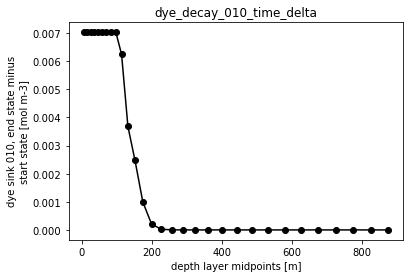

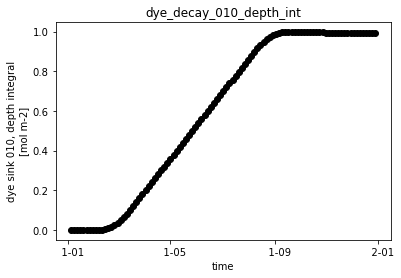

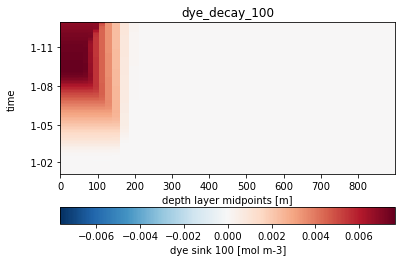

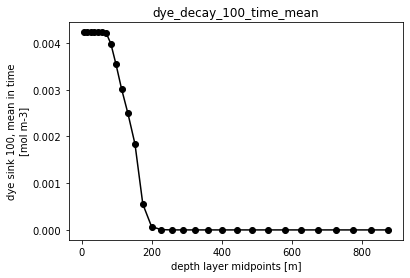

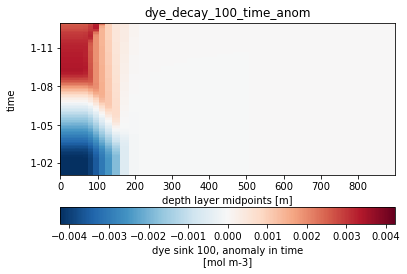

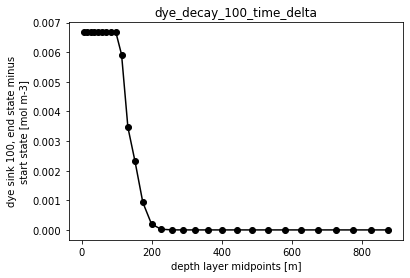

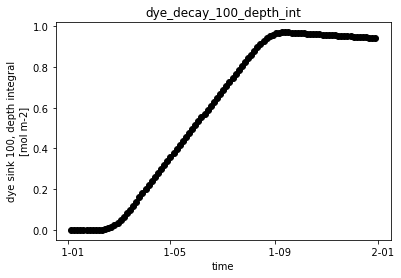

In [6]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "hist_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:        (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth          (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges    (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds   (depth, nbnds) float64 ...
    depth_delta    (depth) float64 ...
    dye_decay_001  (depth) float64 ...
    dye_decay_010  (depth) float64 ...
    dye_decay_100  (depth) float64 ...
Attributes:
    history:  2020-06-05 08:36:13: created by src.test_problem.model_state.Mo...


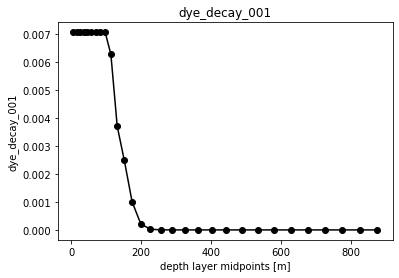

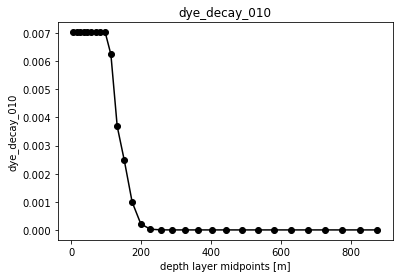

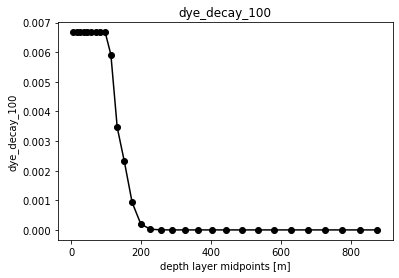

In [7]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "fcn_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

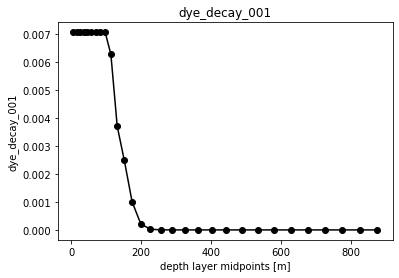

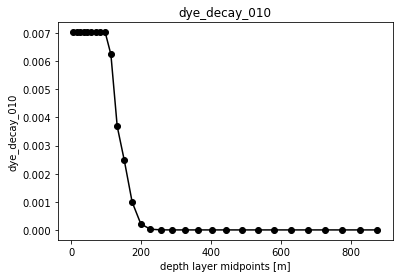

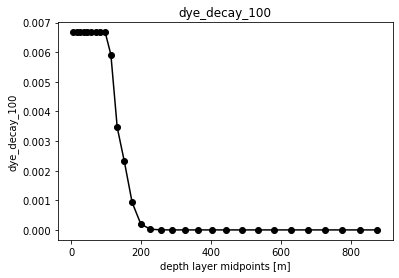

In [8]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate.nc")) as ds:
    plot_all_vars(ds)

In [9]:
nk_driver.main(nk_driver.parse_args(common_args + ["--persist"]))

2020-06-05 08:36:20,836:79844:model_config.py:__init__:loading content from /Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/tracer_module_defs.yaml
2020-06-05 08:36:20,855:79844:model_config.py:check_shadow_tracers:tracer module phosphorus has po4_s as a shadow for po4
2020-06-05 08:36:20,856:79844:model_config.py:check_shadow_tracers:tracer module phosphorus has dop_s as a shadow for dop
2020-06-05 08:36:20,860:79844:model_config.py:check_shadow_tracers:tracer module phosphorus has pop_s as a shadow for pop
2020-06-05 08:36:20,863:79844:model_config.py:__init__:reading depth_delta from /Users/klindsay/test_run_dye_decay_wdir/depth_axis_test.nc for grid_weight
2020-06-05 08:36:20,865:79844:nk_driver.py:main:using class ModelState from src.test_problem.model_state for model state
2020-06-05 08:36:20,867:79844:solver_state.py:__init__:"Newton" iteration now 0
2020-06-05 08:36:29,254:79844:tracer_module_state_base.py:log_vals:iteration=00,iterate,mean[dye_decay_001]=1.110445e-0

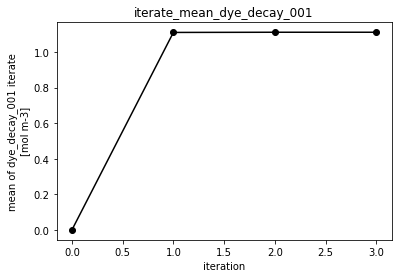

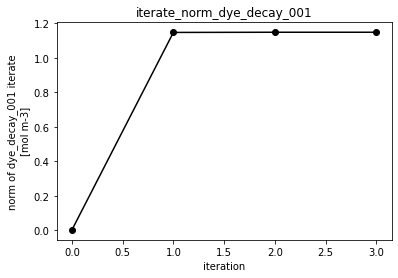

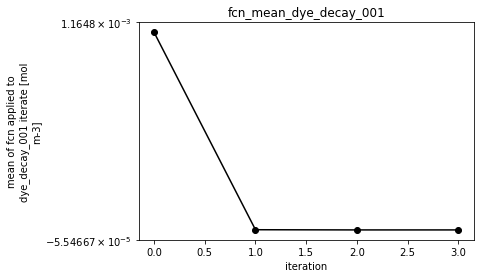

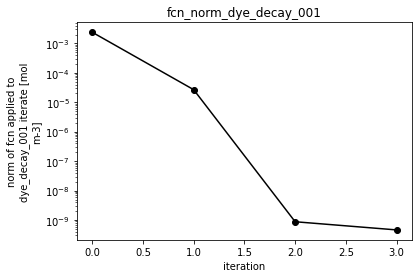

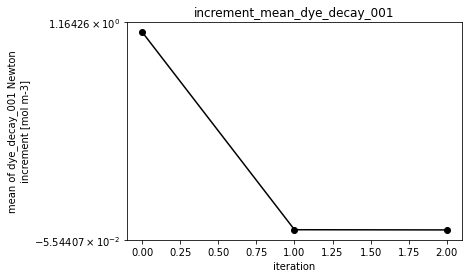

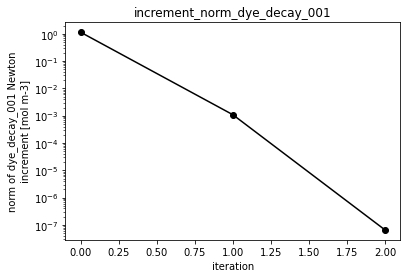

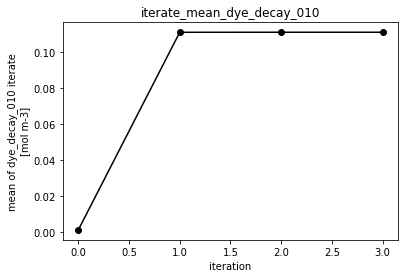

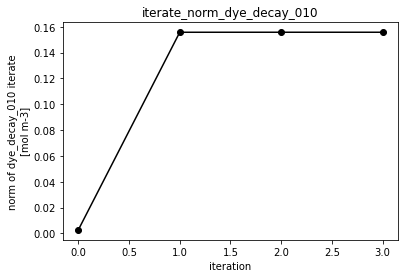

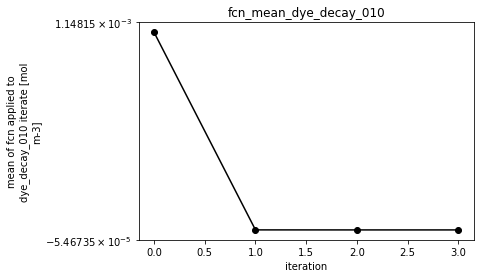

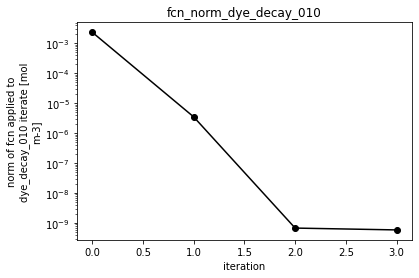

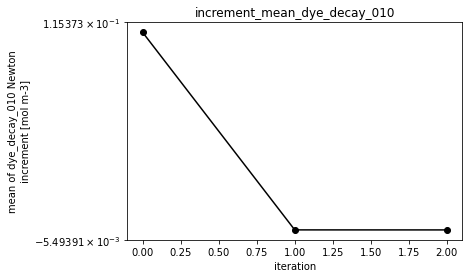

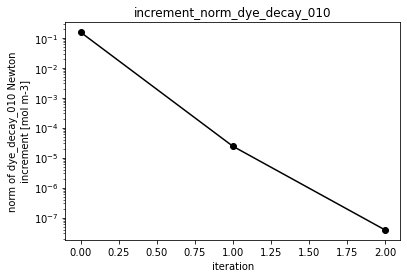

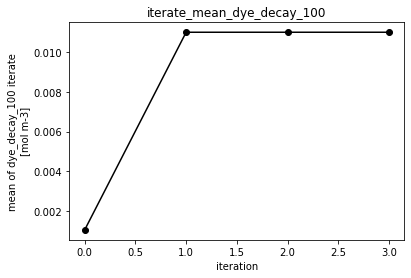

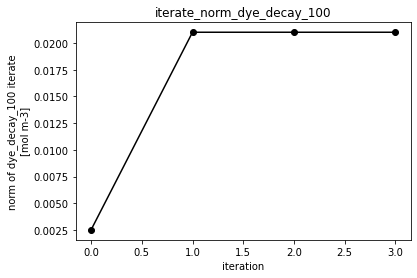

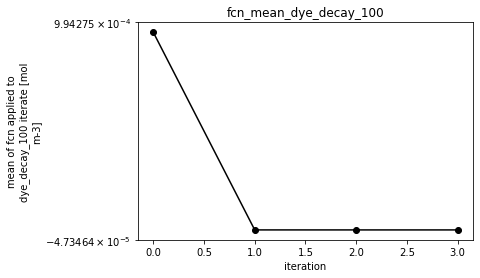

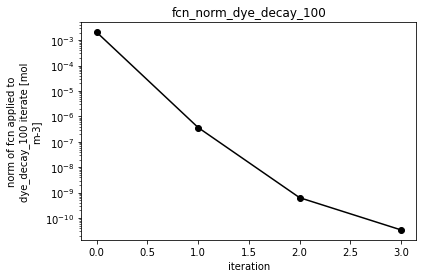

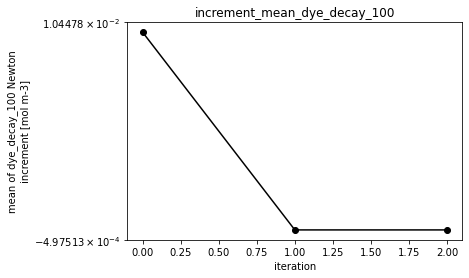

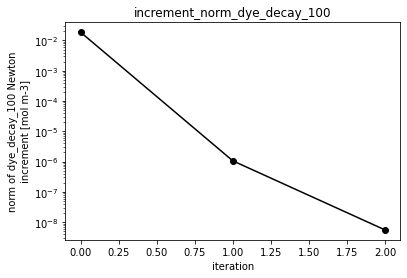

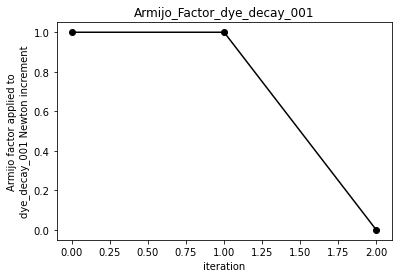

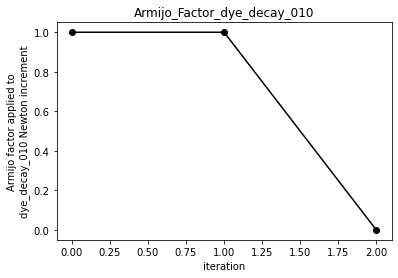

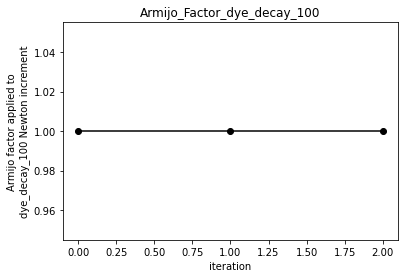

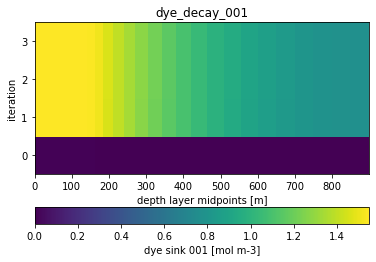

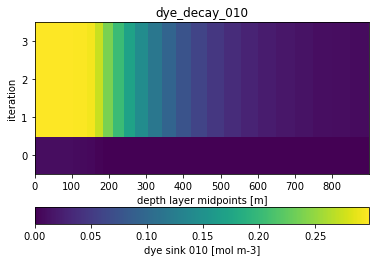

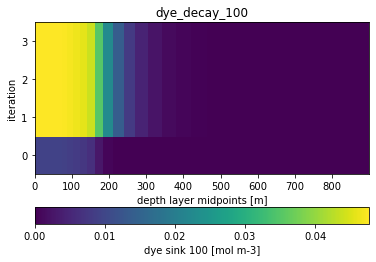

In [10]:
with xr.open_dataset(os.path.join(wdir, "Newton_stats.nc")) as ds:
    print(ds)
    plot_all_vars(ds)
    iterations = len(ds["iteration"])

In [11]:
iter_str_final = f"{iterations-1:02d}"
print(iter_str_final)

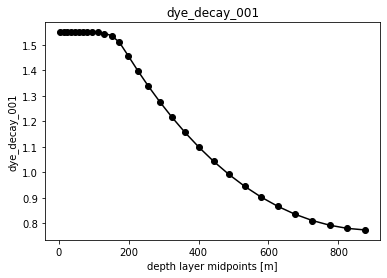

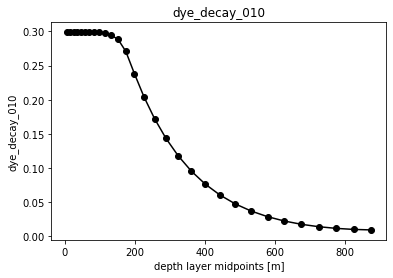

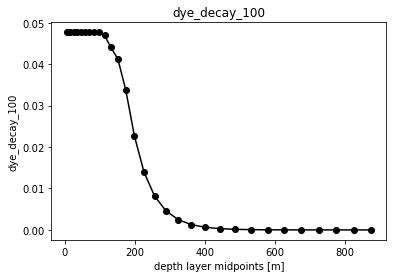

In [12]:
with xr.open_dataset(os.path.join(wdir, f"iterate_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

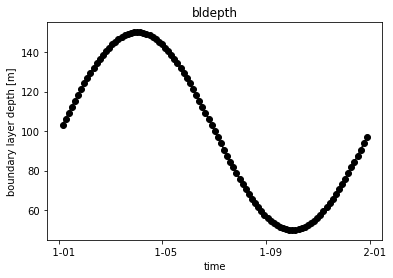

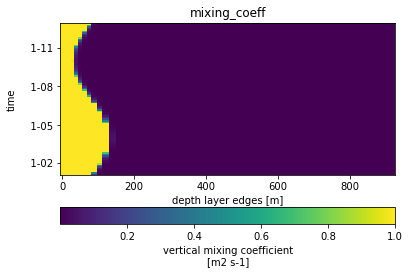

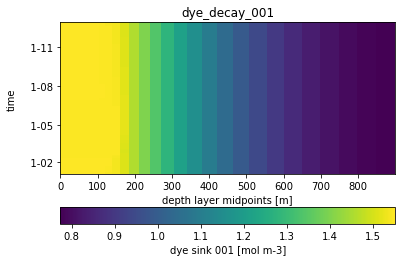

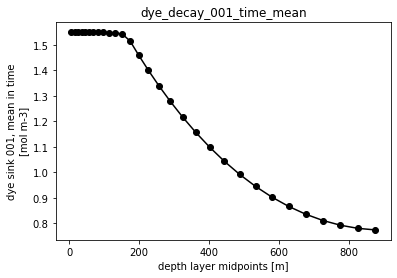

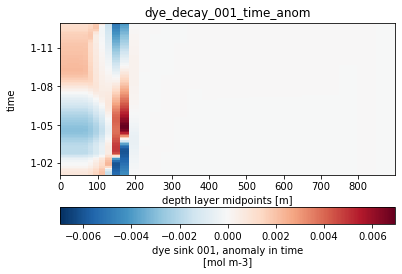

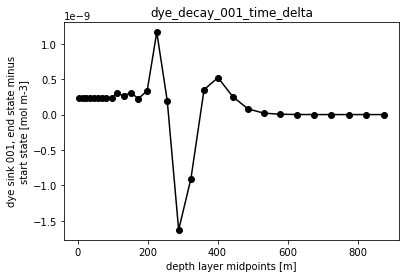

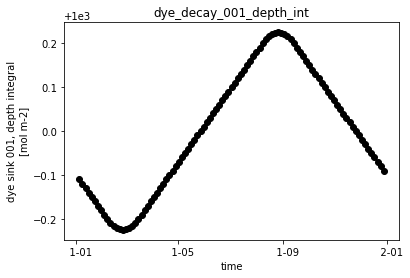

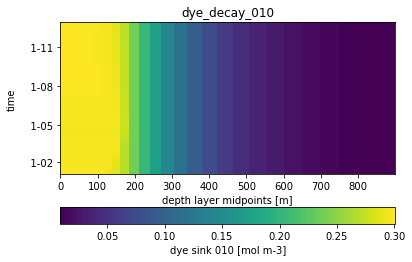

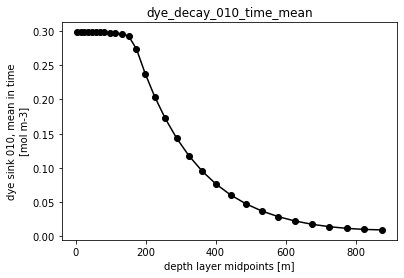

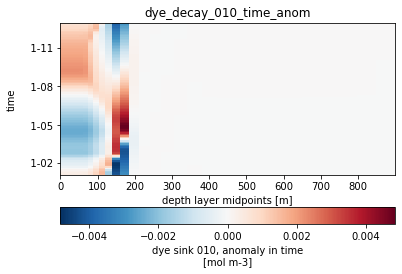

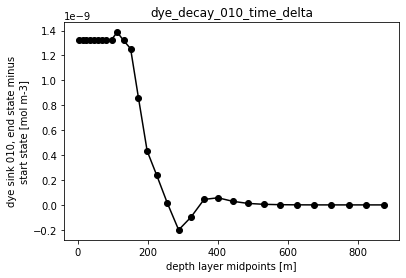

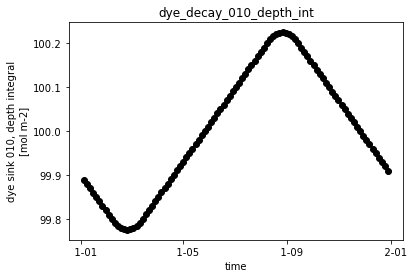

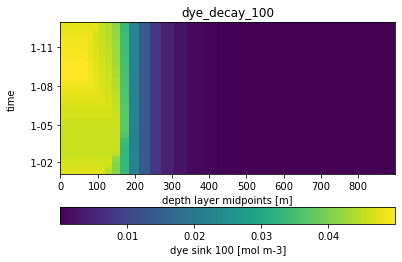

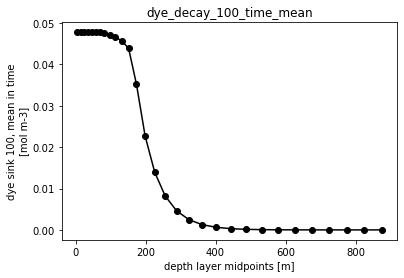

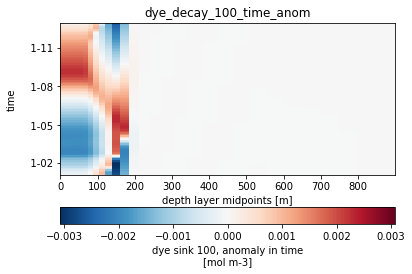

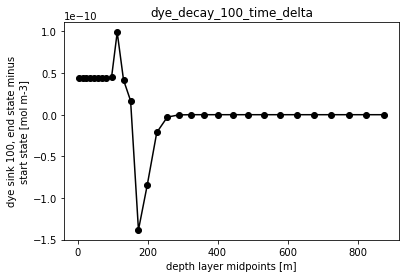

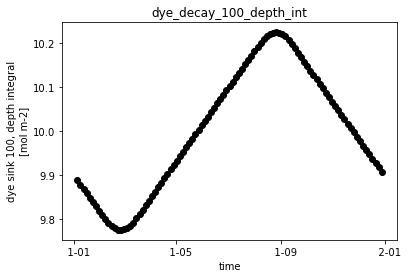

In [13]:
with xr.open_dataset(os.path.join(wdir, f"hist_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

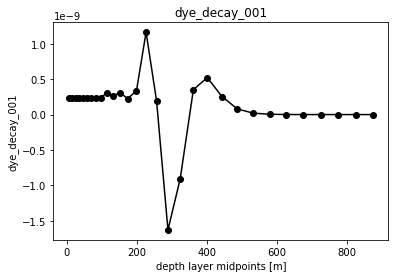

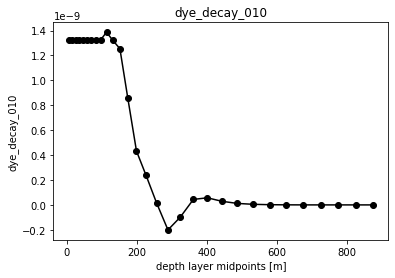

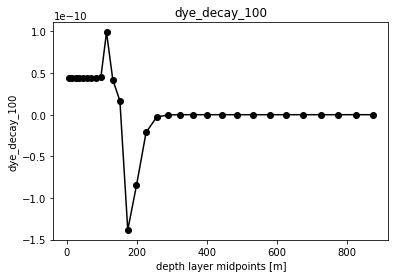

In [14]:
with xr.open_dataset(os.path.join(wdir, f"fcn_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)